# Genre Classification using Support-vector Machine

In [1]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sklearn.svm #containts the class that implements the machine to analyze music
import IPython.display as ipd
import scipy as sp

# Feature computation

In [2]:
#we skip the preliminary elaboration of the signal 
def compute_mfcc(audio, fs, n_mfcc):
    # Compute the spectrogram of the audio signal. We take the magnitude od the signal, windowing it
    X = np.abs(librosa.stft(
        audio,
        window='hamming',
        n_fft=1024, #number of points in which fft will be done in window.
        hop_length=512,)
        )
    
    # Find the weights of the mel filters (in librosa) we must specify: the original f of the signal, what are the points used for 
    #STFF (Short Transfer Fourier Function), how many rectangular filters we want and Min and Max Frequency of the filter. 
    mel = librosa.filters.mel(
        sr=fs,
        n_fft=1024,
        n_mels=40,
        fmin=133.33, #in hz, we decide it. those values are pretty standard
        fmax=6853.8,
    )
    
    # Apply the filters to spectrogram
    melspectrogram = np.dot(mel, X)
    # Take the logarithm
    log_melspectrogram = np.log10(melspectrogram + 1e-16) #we added 1e-16 just to avoid log(0) but is an inignificant value.
    
    # Apply the DCT to log melspectrogram to obtain the coefficients
    mfcc = sp.fftpack.dct(log_melspectrogram, axis=0, norm='ortho')[1:n_mfcc+1]
    return mfcc

### Compute training features

In [3]:
classes = ['rock', 'pop', 'reggae','disco'] #now I wanna train my algorithm.
n_mfcc = 13
dict_train_features = {'rock': [], 'pop': [], 'reggae': [], 'disco': []}

for c in classes:
    print("Sto analizzando " + '{}'.format(c))
    train_root = 'D:/Documenti/SampleCanzoni/PreProcessed/Selected/{}/train/'.format(c)
    class_train_files = [f for f in os.listdir(train_root) if f.endswith('.mp3')] #all files .mp3
    n_train_samples = len(class_train_files)
    
    
    
    train_features = np.zeros((n_train_samples, n_mfcc)) #we initialize the metrics. i'm going to use this feature for the machine.
    for index, f in enumerate(class_train_files):
        audio, fs = librosa.load(os.path.join(train_root, f), sr=None) #first is the directory, the second f is the file
        mfcc = compute_mfcc(audio, fs, n_mfcc) #now I've a matrix of features.
        train_features[index, :] = np.mean(mfcc, axis=1)
        print(f)   
    
        
    dict_train_features[c] = train_features #now we use a dictionary structure to save all features (is a sort of struct)

Sto analizzando rock


C:\Users\metal\.conda\envs\CMLS\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


rock.00000.mp3
rock.00001.mp3
rock.00002.mp3
rock.00003.mp3
rock.00004.mp3
rock.00005.mp3
rock.00006.mp3
rock.00007.mp3
rock.00008.mp3
rock.00009.mp3
rock.00010.mp3
rock.00011.mp3
rock.00012.mp3
rock.00013.mp3
rock.00014.mp3
rock.00015.mp3
rock.00016.mp3
rock.00017.mp3
rock.00018.mp3
rock.00019.mp3
Sto analizzando pop
pop.00000.mp3
pop.00001.mp3
pop.00002.mp3
pop.00003.mp3
pop.00004.mp3
pop.00005.mp3
pop.00006.mp3
pop.00007.mp3
pop.00008.mp3
pop.00009.mp3
pop.00010.mp3
pop.00011.mp3
pop.00012.mp3
pop.00013.mp3
pop.00014.mp3
pop.00015.mp3
pop.00016.mp3
pop.00017.mp3
pop.00018.mp3
pop.00019.mp3
Sto analizzando reggae
reggae.00000.mp3
reggae.00001.mp3
reggae.00002.mp3
reggae.00003.mp3
reggae.00004.mp3
reggae.00005.mp3
reggae.00006.mp3
reggae.00007.mp3
reggae.00008.mp3
reggae.00009.mp3
reggae.00010.mp3
reggae.00011.mp3
reggae.00012.mp3
reggae.00013.mp3
reggae.00014.mp3
reggae.00015.mp3
reggae.00016.mp3
reggae.00017.mp3
reggae.00018.mp3
reggae.00019.mp3
Sto analizzando disco
disco.00000.mp3

In [4]:
class_train_files

['disco.00000.mp3',
 'disco.00001.mp3',
 'disco.00002.mp3',
 'disco.00003.mp3',
 'disco.00004.mp3',
 'disco.00005.mp3',
 'disco.00006.mp3',
 'disco.00007.mp3',
 'disco.00008.mp3',
 'disco.00009.mp3',
 'disco.00010.mp3',
 'disco.00011.mp3',
 'disco.00012.mp3',
 'disco.00013.mp3',
 'disco.00014.mp3',
 'disco.00015.mp3',
 'disco.00016.mp3',
 'disco.00017.mp3',
 'disco.00018.mp3',
 'disco.00019.mp3']

### Compute test features

In [5]:
#the syntax for test files is pretty the same. 
dict_test_features = {'rock': [], 'pop': [], 'reggae': [], 'disco': []}

for c in classes:
    test_root = 'D:/Documenti/SampleCanzoni/PreProcessed/Selected/{}/test/'.format(c)
    class_test_files = [f for f in os.listdir(test_root) if f.endswith('.mp3')]
    n_test_samples = len(class_test_files)
    
    test_features = np.zeros((n_test_samples, n_mfcc))
    for index, f in enumerate(class_test_files):
        audio, fs = librosa.load(os.path.join(test_root, f), sr=None)
        mfcc = compute_mfcc(audio, fs, n_mfcc)
        test_features[index, :] = np.mean(mfcc, axis=1)
    dict_test_features[c] = test_features

### Feature visualization

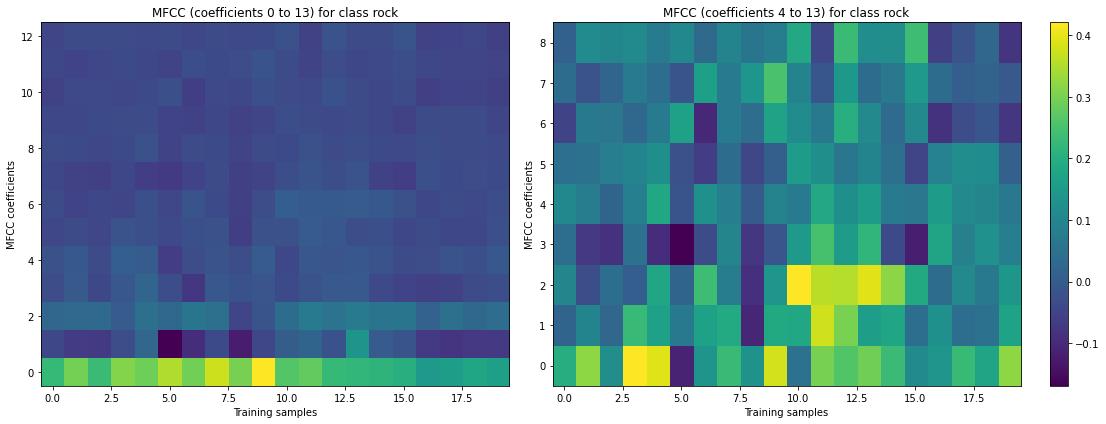

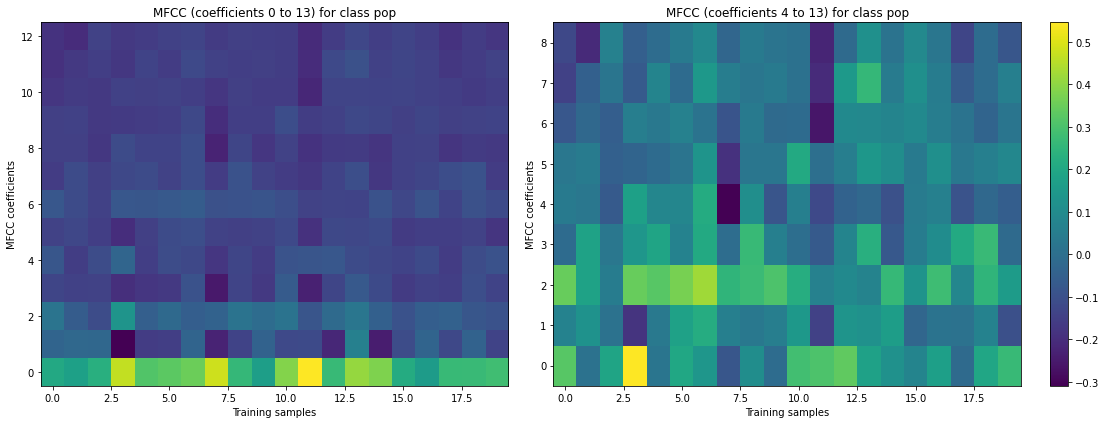

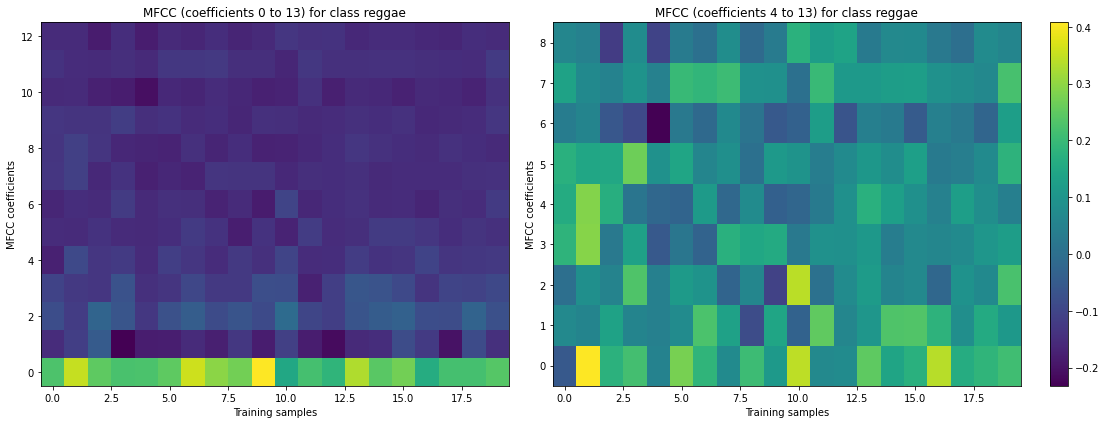

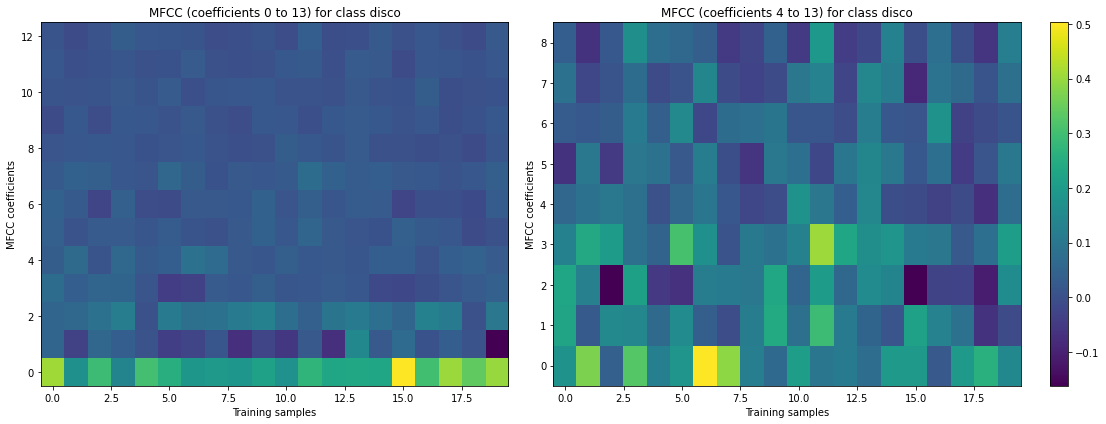

In [6]:
for c in classes:
    mfcc = dict_train_features[c].transpose()
    # Visualization
    fig = plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(mfcc, origin='lower', aspect='auto')
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.title('MFCC (coefficients 0 to 13) for class {}'.format(c))
    plt.colorbar()
    plt.tight_layout()

    mfcc_upper = mfcc[4:]
    plt.subplot(1,2,2)
    plt.imshow(mfcc_upper, origin='lower', aspect='auto')
    plt.title('MFCC (coefficients 4 to 13) for class {}'.format(c))
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.tight_layout()

# SVM: multiclass case

In [7]:
class_0 = 'rock'
class_1 = 'pop'
class_2 = 'reggae'
class_3 = 'disco'

X_train_0 = dict_train_features[class_0]
X_train_1 = dict_train_features[class_1]
X_train_2 = dict_train_features[class_2]
X_train_3 = dict_train_features[class_3]

y_train_0 = np.zeros((X_train_0.shape[0],))
y_train_1 = np.ones((X_train_1.shape[0],))
y_train_2 = np.ones((X_train_2.shape[0],))*2
y_train_3 = np.ones((X_train_3.shape[0],))*3

#y_train = np.concatenate((y_train_class_0, y_train_class_1, y_train_class_1), axis=0) 


In [8]:
X_test_0 = dict_test_features[class_0]
X_test_1 = dict_test_features[class_1]
X_test_2 = dict_test_features[class_2]
X_test_3 = dict_test_features[class_3]


y_test_0 = np.zeros((X_test_0.shape[0],))
y_test_1 = np.ones((X_test_1.shape[0],))
y_test_2 = np.ones((X_test_2.shape[0],))*2
y_test_3 = np.ones((X_test_1.shape[0],))*3

y_test_mc = np.concatenate((y_test_0, y_test_1, y_test_2, y_test_3), axis=0)


### Normalize features

In [9]:
feat_max = np.max(np.concatenate((X_train_0, X_train_1, X_train_2, X_train_3), axis=0), axis=0)
feat_min = np.min(np.concatenate((X_train_0, X_train_1, X_train_2, X_train_3), axis=0), axis=0)

X_train_0_normalized = (X_train_0 - feat_min) / (feat_max - feat_min)
X_train_1_normalized = (X_train_1 - feat_min) / (feat_max - feat_min)
X_train_2_normalized = (X_train_2 - feat_min) / (feat_max - feat_min)
X_train_3_normalized = (X_train_3 - feat_min) / (feat_max - feat_min)

X_test_0_normalized = (X_test_0 - feat_min) / (feat_max - feat_min)
X_test_1_normalized = (X_test_1 - feat_min) / (feat_max - feat_min)
X_test_2_normalized = (X_test_2 - feat_min) / (feat_max - feat_min) #we concatenate to obtain max/min
X_test_3_normalized = (X_test_3 - feat_min) / (feat_max - feat_min)

X_test_mc_normalized = np.concatenate((X_test_0_normalized, X_test_1_normalized, X_test_2_normalized, X_test_3_normalized), axis=0)


### Define and train a model for each couple of classes

In [10]:
SVM_parameters={
    'C': 1,
    'kernel': 'rbf',
}

clf_01 = sklearn.svm.SVC(**SVM_parameters, probability=True)
clf_02 = sklearn.svm.SVC(**SVM_parameters, probability=True)
clf_03 = sklearn.svm.SVC(**SVM_parameters, probability=True)

clf_12 = sklearn.svm.SVC(**SVM_parameters, probability=True)
clf_13 = sklearn.svm.SVC(**SVM_parameters, probability=True)

clf_23 = sklearn.svm.SVC(**SVM_parameters, probability=True)


In [11]:
clf_01.fit(np.concatenate((X_train_0_normalized, X_train_1_normalized), axis=0), 
           np.concatenate((y_train_0, y_train_1), axis=0))
           
clf_02.fit(np.concatenate((X_train_0_normalized, X_train_2_normalized), axis=0), 
           np.concatenate((y_train_0, y_train_2), axis=0))

clf_03.fit(np.concatenate((X_train_0_normalized, X_train_3_normalized), axis=0), 
           np.concatenate((y_train_0, y_train_3), axis=0))


clf_12.fit(np.concatenate((X_train_1_normalized, X_train_2_normalized), axis=0), 
           np.concatenate((y_train_1, y_train_2), axis=0)) 

clf_13.fit(np.concatenate((X_train_1_normalized, X_train_3_normalized), axis=0), 
           np.concatenate((y_train_1, y_train_3), axis=0)) 


clf_23.fit(np.concatenate((X_train_2_normalized, X_train_3_normalized), axis=0), 
           np.concatenate((y_train_2, y_train_3), axis=0)) 
#now we have a tree of model.

SVC(C=1, probability=True)

### Evaluate each classifier

In [12]:
#now we predict test on label. They're all binary classifiers. We have 3 prediction and we must extract the most present.
y_test_predicted_01 = clf_01.predict(X_test_mc_normalized).reshape(-1, 1)
y_test_predicted_02 = clf_02.predict(X_test_mc_normalized).reshape(-1, 1)
y_test_predicted_03 = clf_03.predict(X_test_mc_normalized).reshape(-1, 1)

y_test_predicted_12 = clf_12.predict(X_test_mc_normalized).reshape(-1, 1)
y_test_predicted_13 = clf_13.predict(X_test_mc_normalized).reshape(-1, 1)

y_test_predicted_23 = clf_23.predict(X_test_mc_normalized).reshape(-1, 1)


### Majority voting

In [13]:
y_test_predicted_mc = np.concatenate((y_test_predicted_01, y_test_predicted_02, y_test_predicted_03, y_test_predicted_12, y_test_predicted_13, y_test_predicted_23 ), axis=1)
y_test_predicted_mc = np.array(y_test_predicted_mc, dtype=np.int)

In [14]:
y_test_predicted_mv = np.zeros((y_test_predicted_mc.shape[0],))
for i, e in enumerate(y_test_predicted_mc):
    y_test_predicted_mv[i] = np.bincount(e).argmax() 

### *Exercise 3* : compute confusion matrix for multiclass

In [15]:
#we fill the matrix for each sample
def compute_cm_multiclass(gt, predicted):
    classes = np.unique(gt)
    
    CM = np.zeros((len(classes), len(classes)))
    
    for i in np.arange(len(classes)):
        pred_class = predicted[gt==i]
        
        for j in np.arange(len(pred_class)): #the element in position"label" and the element in predicted class 
            CM[i, int(pred_class[j])] = CM[i, int(pred_class[j])] + 1 
    print(CM)

In [16]:
compute_cm_multiclass(y_test_mc, y_test_predicted_mv)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 260 but corresponding boolean dimension is 320